In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error


def evaluate_cate_accuracy_with_random_samples(true_cate, predicted_cate, n_samples, n_iterations=10, random_state=42):
    """
    Evaluate CATE accuracy using fixed random samples for variability assessment.
    
    Parameters:
    - true_cate: 1D array-like or DataFrame, ground truth CATE values.
    - predicted_cate: 1D array-like or DataFrame, predicted CATE values.
    - n_samples: int, number of random samples to evaluate on.
    - n_iterations: int, number of iterations to average over.
    - random_state: int, seed for reproducibility.
    
    Returns:
    - dict, containing mean and standard deviation of MSE across random samples.
    """
    # Ensure true_cate and predicted_cate are 1D arrays
    if isinstance(true_cate, pd.DataFrame):
        true_cate = true_cate.squeeze()  # Convert DataFrame to Series (1D)
    if isinstance(predicted_cate, pd.DataFrame):
        predicted_cate = predicted_cate.squeeze()  # Convert DataFrame to Series (1D)
    
    # Convert to numpy arrays
    true_cate = np.array(true_cate).flatten()
    predicted_cate = np.array(predicted_cate).flatten()

    # Validate input shapes
    if true_cate.shape[0] != predicted_cate.shape[0]:
        raise ValueError("true_cate and predicted_cate must have the same length.")

    mse_random_samples = []
    rng = np.random.default_rng(seed=random_state)  # Random number generator for reproducibility

    for _ in range(n_iterations):
        # Select random indices
        indices = rng.choice(len(true_cate), n_samples, replace=False)
        true_cate_sample = true_cate[indices]
        predicted_cate_sample = predicted_cate[indices]

        # Calculate MSE for this random sample
        mse = mean_squared_error(true_cate_sample, predicted_cate_sample)
        mse_random_samples.append(mse)

    # Return the mean and standard deviation of MSE across iterations
    return {
        "mean_mse": np.mean(mse_random_samples),
        "std_mse": np.std(mse_random_samples),
    }


In [9]:
# Load the saved CATE estimates for Hypothesis P
s_learner_cate_p = pd.read_csv('../../results/benchmark_data_results/test_data/s_learner_cate_p.csv', index_col=0)
t_learner_cate_p = pd.read_csv('../../results/benchmark_data_results/test_data/t_learner_cate_p.csv', index_col=0)
x_learner_cate_p = pd.read_csv('../../results/benchmark_data_results/test_data/x_learner_cate_p.csv', index_col=0)
r_learner_cate_p = pd.read_csv('../../results/benchmark_data_results/test_data/r_learner_cate_p.csv', index_col=0)

# Load the saved CATE estimates for Hypothesis K
s_learner_cate_k = pd.read_csv('../../results/benchmark_data_results/test_data/s_learner_cate_k.csv', index_col=0)
t_learner_cate_k = pd.read_csv('../../results/benchmark_data_results/test_data/t_learner_cate_k.csv', index_col=0)
x_learner_cate_k = pd.read_csv('../../results/benchmark_data_results/test_data/x_learner_cate_k.csv', index_col=0)
r_learner_cate_k = pd.read_csv('../../results/benchmark_data_results/test_data/r_learner_cate_k.csv', index_col=0)

# Load the saved ground truth CATE values for Hypothesis P and K
true_cate_test_p = pd.read_csv('../../results/benchmark_data_results/test_data/true_cate_test_p.csv', index_col=0)
true_cate_test_k = pd.read_csv('../../results/benchmark_data_results/test_data/true_cate_test_k.csv', index_col=0)

In [10]:
# Evaluate for different random sample sizes
random_sample_sizes = [10, 100, 1000]
n_iterations = 10

# Placeholder for results
results_p = {
    "Learner": [],
    "RandomSampleSize": [],
    "Mean_MSE_Hypothesis_p": [],
    "STD_MSE_Hypothesis_p": [],
}

for learner, predicted_cate in zip(
    ["S-Learner", "T-Learner", "X-Learner", "R-Learner"],
    [s_learner_cate_p, t_learner_cate_p, x_learner_cate_p, r_learner_cate_p],
):
    for n_samples in random_sample_sizes:
        random_sample_result = evaluate_cate_accuracy_with_random_samples(
            true_cate_test_p, predicted_cate, n_samples=n_samples, n_iterations=n_iterations, random_state=42
        )
        results_p["Learner"].append(learner)
        results_p["RandomSampleSize"].append(n_samples)
        results_p["Mean_MSE_Hypothesis_p"].append(random_sample_result["mean_mse"])
        results_p["STD_MSE_Hypothesis_p"].append(random_sample_result["std_mse"])

# Combine results into a DataFrame
results_p_df = pd.DataFrame(results_p)

# Display the results
print(results_p_df)

      Learner  RandomSampleSize  Mean_MSE_Hypothesis_p  STD_MSE_Hypothesis_p
0   S-Learner                10               0.088355              0.033993
1   S-Learner               100               0.092444              0.009242
2   S-Learner              1000               0.093062              0.002355
3   T-Learner                10               0.303733              0.085386
4   T-Learner               100               0.295390              0.024628
5   T-Learner              1000               0.302724              0.005239
6   X-Learner                10               0.236303              0.069652
7   X-Learner               100               0.237036              0.020955
8   X-Learner              1000               0.238851              0.004674
9   R-Learner                10               0.069007              0.024989
10  R-Learner               100               0.073093              0.005321
11  R-Learner              1000               0.073965              0.001051

In [11]:

# Placeholder for results
results_k = {
    "Learner": [],
    "RandomSampleSize": [],
    "Mean_MSE_Hypothesis_k": [],
    "STD_MSE_Hypothesis_k": [],
}

for learner, predicted_cate in zip(
    ["S-Learner", "T-Learner", "X-Learner", "R-Learner"],
    [s_learner_cate_k, t_learner_cate_k, x_learner_cate_k, r_learner_cate_k],
):
    for n_samples in random_sample_sizes:
        random_sample_result = evaluate_cate_accuracy_with_random_samples(
            true_cate_test_k, predicted_cate, n_samples=n_samples, n_iterations=n_iterations, random_state=42
        )
        results_k["Learner"].append(learner)
        results_k["RandomSampleSize"].append(n_samples)
        results_k["Mean_MSE_Hypothesis_k"].append(random_sample_result["mean_mse"])
        results_k["STD_MSE_Hypothesis_k"].append(random_sample_result["std_mse"])

# Combine results into a DataFrame
results_k_df = pd.DataFrame(results_k)

# Display the results
print(results_k_df)

      Learner  RandomSampleSize  Mean_MSE_Hypothesis_k  STD_MSE_Hypothesis_k
0   S-Learner                10               0.121255              0.034808
1   S-Learner               100               0.113749              0.010689
2   S-Learner              1000               0.118496              0.002030
3   T-Learner                10               0.144776              0.086698
4   T-Learner               100               0.142155              0.028794
5   T-Learner              1000               0.150757              0.005894
6   X-Learner                10               0.083333              0.028343
7   X-Learner               100               0.080768              0.008788
8   X-Learner              1000               0.082062              0.001745
9   R-Learner                10               2.707645              0.935914
10  R-Learner               100               2.446449              0.269036
11  R-Learner              1000               2.658578              0.033603

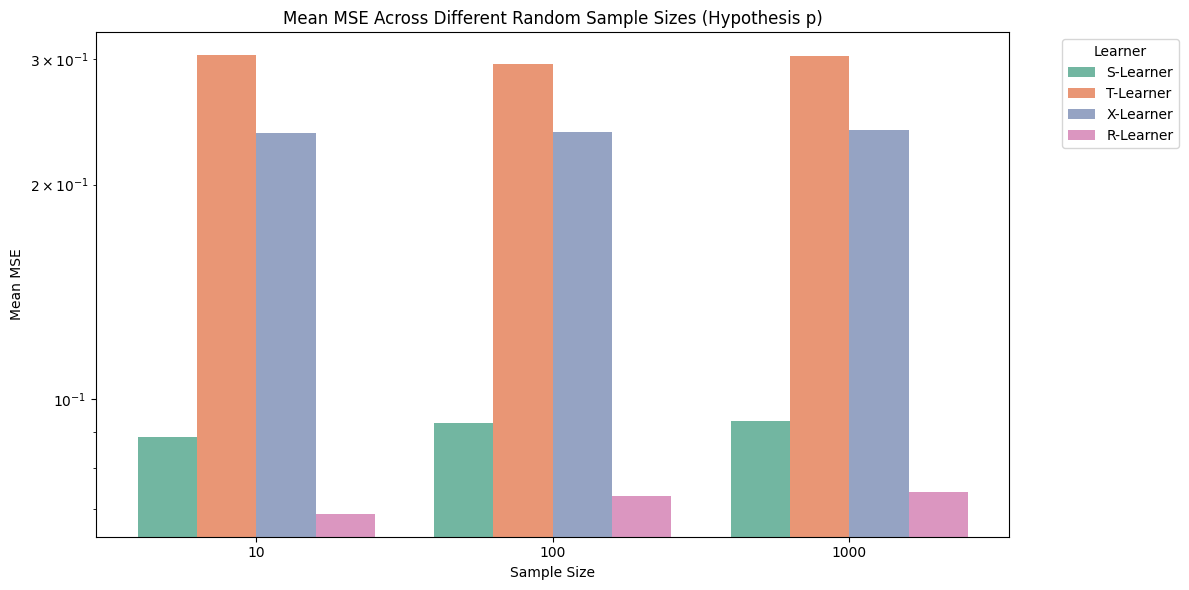

In [12]:
# Visualization for Hypothesis p
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    data=results_p_df,
    x="RandomSampleSize",
    y="Mean_MSE_Hypothesis_p",
    hue="Learner",
    palette="Set2"
)
plt.errorbar(
    x=results_p_df["RandomSampleSize"],
    y=results_p_df["Mean_MSE_Hypothesis_p"],
    fmt="none",
    c="black",
    capsize=5,
    alpha=0.7,
)
plt.yscale("log")
plt.title("Mean MSE Across Different Random Sample Sizes (Hypothesis p)")
plt.xlabel("Sample Size")
plt.ylabel("Mean MSE")
plt.legend(title="Learner", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


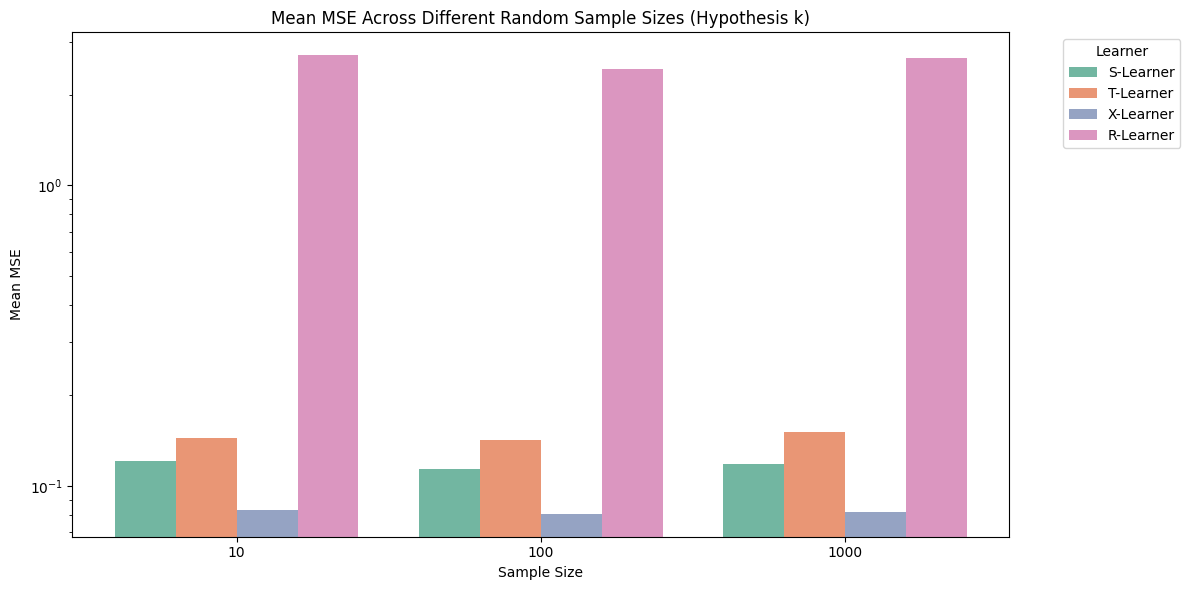

In [13]:
# Visualization for Hypothesis k
plt.figure(figsize=(12, 6))
sns.barplot(
    data=results_k_df,
    x="RandomSampleSize",
    y="Mean_MSE_Hypothesis_k",
    hue="Learner",
    palette="Set2"
)
plt.errorbar(
    x=results_k_df["RandomSampleSize"],
    y=results_k_df["Mean_MSE_Hypothesis_k"],
    fmt="none",
    c="black",
    capsize=5,
    alpha=0.7,
)
plt.yscale("log")
plt.title("Mean MSE Across Different Random Sample Sizes (Hypothesis k)")
plt.xlabel("Sample Size")
plt.ylabel("Mean MSE")
plt.legend(title="Learner", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()